In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [176]:
df = pd.read_csv('../datasets/merged_df_mon.csv')
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,65.929134,43.448181,0.945227,27.710843,8.0,9.0,NaN,91.89,55.595550,0.509
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,44.686107,10.799292,2.507985,30.454545,36.0,36.0,NaN,55.50,23.916555,0.582
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,125.710352,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792
3,Andorra,AND,11.850,NaN,40.042553,1.744681,NaN,NaN,NaN,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,208.978600,1285.099111,NaN,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889


### Checking Null Values

In [177]:
df.isnull().sum()

Country Name                    0
Country Code                    0
rural_pop_percent_17            1
food_production_index_17        2
ag_land_area_17                 1
arable_land_percent_2017        2
net_migration_2017              6
hiv_prevalence_2017            55
mat_mortality_ratio_2017        7
under5_mortality_ratio_2017     2
tubercul_incidence_2017         1
elec_access_2017                1
ren_energy_percent_2017         0
co2_emissions_2017              2
pop_air_pollution_2017          4
foreign_dir_inv_2017            4
atm_access_2017                17
adol_fertility_rate_2017        6
fem_labor_part_rate_2017       11
male_labor_part_rate_2017      11
fertility_rate_2017             5
dpt_immuniz_rate_2017           2
undernourished_rate_2017       33
cell_subscriptions_per100       1
internet_per_mil_2017           0
military_exp_2017              37
women_seats_percent_2017        5
male_bus_start_2017             4
female_bus_start_2017           4
patent_apps_20

## Data Cleaning

#### 1. Rural Population %

In [178]:
df['rural_pop_percent_17'].describe()

count    186.000000
mean      41.836919
std       23.193779
min        0.000000
25%       22.436000
50%       41.837500
75%       60.423250
max       87.294000
Name: rural_pop_percent_17, dtype: float64

In [179]:
df[df['rural_pop_percent_17'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
50,Eritrea,ERI,NaN,101.370003,75.168317,6.831683,-199290.0,0.6,480.0,43.3,...,20.363955,0.0,NaN,22.0,84.0,84.0,NaN,13.65,33.79103,0.456


Eritrea is the only country where data is unavailable. Based on geographic peers and our own estimations, we are going to assign Eritrea a value in line with the 75% value.

In [180]:
df.loc[df['Country Name'] == 'Eritrea', ['rural_pop_percent_17']] = df['rural_pop_percent_17'].quantile(0.75)

#### 2. Food Production Index

In [181]:
df['food_production_index_17'].describe()

count    185.000000
mean     103.801459
std        8.490092
min       79.320000
25%       99.000000
50%      102.830002
75%      107.400002
max      139.860001
Name: food_production_index_17, dtype: float64

In [182]:
df[df['food_production_index_17'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,NaN,40.042553,1.744681,NaN,NaN,NaN,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
135,Palau,PLW,20.635,NaN,9.347826,0.652174,NaN,NaN,NaN,18.6,...,NaN,224.605537,NaN,12.500000,28.0,28.0,NaN,5.96,38.715217,0.822


Palau and Andorra are the countries where data is unavailable. Based on geographic peers and our own estimations, we are going to assign both countries the median value of the metric as we do not believe that either countries will have a particularly extreme value 

In [183]:
df.loc[df['Country Name'] == 'Andorra', ['food_production_index_17']] = df['food_production_index_17'].median()
df.loc[df['Country Name'] == 'Palau', ['food_production_index_17']] = df['food_production_index_17'].median()

#### 3. Agricultural Land Area %

In [184]:
df['ag_land_area_17'].describe()

count    186.000000
mean      38.996556
std       21.473358
min        0.538462
25%       22.643333
50%       39.969657
75%       54.616763
max       80.769413
Name: ag_land_area_17, dtype: float64

In [185]:
df[df['ag_land_area_17'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
140,West Bank and Gaza,PSE,24.106,105.870003,NaN,NaN,-52816.0,NaN,27.0,18.1,...,84.179796,547.723189,NaN,NaN,43.0,44.0,NaN,324.96,740.000831,0.708


West Bank and Gaza is the only country where data is unavailable. Based on our own estimations, we are going to assign West Bank and Gaza a value in line with the 25% value.

In [186]:
df.loc[df['Country Name'] == 'West Bank and Gaza', ['ag_land_area_17']] = df['ag_land_area_17'].quantile(0.25)

#### 4. Arable Land Area %

In [187]:
df['arable_land_percent_2017'].describe()

count    185.000000
mean      14.672965
std       13.633534
min        0.086281
25%        4.129606
50%       10.985332
75%       21.929825
max       59.593839
Name: arable_land_percent_2017, dtype: float64

In [188]:
df[df['arable_land_percent_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
140,West Bank and Gaza,PSE,24.106,105.870003,22.643333,NaN,-52816.0,NaN,27.0,18.1,...,84.179796,547.723189,NaN,NaN,43.0,44.0,NaN,324.96,740.000831,0.708
153,South Sudan,SSD,80.654,102.809998,45.151463,NaN,-870998.0,2.2,1150.0,97.9,...,25.561301,0.183305,2.354538,28.45953,13.0,13.0,NaN,6.40,17.265411,0.429


West Bank and Gaza and South Sudan are the only countries where data is unavailable. Based on our own estimations, we are going to assign West Bank and Gaza a value in line with the 25% value; while South Sudan will be assigned a value in line with the median value

In [189]:
df.loc[df['Country Name'] == 'West Bank and Gaza', ['arable_land_percent_2017']] = df['arable_land_percent_2017'].quantile(0.25)
df.loc[df['Country Name'] == 'South Sudan', ['arable_land_percent_2017']] = df['arable_land_percent_2017'].median()

#### 5. Net Migration

In [190]:
df['net_migration_2017'].describe()

count    1.810000e+02
mean     4.013564e+03
std      6.483328e+05
min     -3.266243e+06
25%     -5.665800e+04
50%     -4.999000e+03
75%      5.600000e+04
max      4.774029e+06
Name: net_migration_2017, dtype: float64

In [191]:
df[df['net_migration_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,NaN,NaN,NaN,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
45,Dominica,DMA,29.819,99.660004,33.333333,8.000000,NaN,NaN,NaN,33.5,...,105.278625,6968.933669,NaN,25.000000,12.0,12.0,NaN,12.50,95.280000,0.738
91,St. Kitts and Nevis,KNA,69.227,94.040001,23.076923,19.230769,NaN,NaN,NaN,16.2,...,147.714478,3113.229303,NaN,13.333333,18.5,18.5,NaN,28.32,200.138462,0.773
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,NaN,NaN,NaN,NaN,...,122.756614,23912.180928,NaN,12.000000,NaN,NaN,NaN,33.89,236.281250,0.919
110,Marshall Islands,MHL,23.366,126.669998,47.777778,11.111111,NaN,NaN,NaN,33.5,...,27.558648,103.353832,NaN,9.090909,17.0,17.0,NaN,0.72,322.516667,0.702
135,Palau,PLW,20.635,102.830002,9.347826,0.652174,NaN,NaN,NaN,18.6,...,NaN,224.605537,NaN,12.500000,28.0,28.0,NaN,5.96,38.715217,0.822


Andorra, Dominica, St Kitts and Nevis, Liechtenstein, Marshall Islands and Palau are the countries where data is unavailable. Based on our own estimations, we are going to assign al countries a value in line with the median value. We do not see any reason why any of the countries would be seeing higher or lower than expected net migration.

In [192]:
df.loc[df['Country Name'] == 'Andorra', ['net_migration_2017']] = df['net_migration_2017'].median()
df.loc[df['Country Name'] == 'Dominica', ['net_migration_2017']] = df['net_migration_2017'].median()
df.loc[df['Country Name'] == 'St. Kitts and Nevis', ['net_migration_2017']] = df['net_migration_2017'].median()
df.loc[df['Country Name'] == 'Liechtenstein', ['net_migration_2017']] = df['net_migration_2017'].median()
df.loc[df['Country Name'] == 'Marshall Islands', ['net_migration_2017']] = df['net_migration_2017'].median()
df.loc[df['Country Name'] == 'Palau', ['net_migration_2017']] = df['net_migration_2017'].median()

#### 6. HIV Prevalence

In [193]:
df['hiv_prevalence_2017'].describe()

count    132.000000
mean       1.935606
std        4.489515
min        0.100000
25%        0.175000
50%        0.400000
75%        1.300000
max       28.500000
Name: hiv_prevalence_2017, dtype: float64

In [194]:
df[df['hiv_prevalence_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,NaN,NaN,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
7,Antigua and Barbuda,ATG,75.287,101.589996,20.454545,9.090909,0.0,NaN,42.0,7.1,...,192.819567,890.751899,NaN,11.111111,22.000,22.000,NaN,5.20,216.875000,0.772
9,Austria,AUT,41.906,98.519997,32.169413,16.104460,324998.0,NaN,5.0,3.6,...,123.119296,7431.714636,0.757321,34.426230,21.000,21.000,2073.0,12850.61,106.611318,0.921
12,Belgium,BEL,2.039,101.910004,43.824306,27.608983,240000.0,NaN,5.0,4.1,...,99.453035,8300.544045,0.883681,38.000000,4.500,4.500,1001.0,16278.27,375.665720,0.930
15,Bangladesh,BGD,64.142,107.860001,70.579473,59.593839,-1847503.0,NaN,173.0,34.2,...,94.526473,65.209460,1.240256,20.285714,19.500,19.500,61.0,2990.72,1226.745187,0.625
16,Bulgaria,BGR,25.331,106.230003,46.329403,32.139646,-24001.0,NaN,10.0,7.3,...,120.140447,32308.325656,1.226244,23.750000,23.000,23.000,202.0,2808.03,65.180057,0.813
17,Bahrain,BHR,10.814,122.360001,11.025641,2.051282,239000.0,NaN,14.0,7.3,...,158.256809,359.419227,4.338775,7.500000,8.000,9.000,8.0,259.34,1915.483333,0.852
19,Bosnia and Herzegovina,BIH,52.124,94.699997,43.515625,20.703125,-107926.0,NaN,10.0,6.1,...,102.642379,1499.015078,0.864183,21.428571,80.000,80.000,87.0,724.80,65.459648,0.777
24,Barbados,BRB,68.841,103.260002,23.255814,16.279070,-397.0,NaN,27.0,13.4,...,115.139118,768.615339,NaN,16.666667,16.000,16.000,NaN,48.84,665.648837,0.810
25,Brunei Darussalam,BRN,22.688,98.529999,2.732448,0.948767,0.0,NaN,31.0,11.0,...,128.331366,1620.802816,2.865170,9.090909,12.000,13.000,8.0,214.24,80.546679,0.836


The countries above are the countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the median value.

In [195]:
df['hiv_prevalence_2017'].fillna(df['hiv_prevalence_2017'].median(), inplace=True)

#### 7. Maternal Mortality Rate

In [196]:
df['mat_mortality_ratio_2017'].describe()

count     180.000000
mean      158.272222
std       229.808733
min         2.000000
25%        12.000000
50%        52.500000
75%       188.250000
max      1150.000000
Name: mat_mortality_ratio_2017, dtype: float64

In [197]:
df[df['mat_mortality_ratio_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,NaN,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
45,Dominica,DMA,29.819,99.660004,33.333333,8.000000,-4999.0,0.4,NaN,33.5,...,105.278625,6968.933669,NaN,25.000000,12.0,12.0,NaN,12.50,95.280000,0.738
70,"Hong Kong SAR, China",HKG,0.000,98.709999,4.857143,2.952381,146542.0,0.4,NaN,NaN,...,251.765006,10482.740897,NaN,NaN,1.5,1.5,324.0,NaN,7041.142857,0.946
91,St. Kitts and Nevis,KNA,69.227,94.040001,23.076923,19.230769,-4999.0,0.4,NaN,16.2,...,147.714478,3113.229303,NaN,13.333333,18.5,18.5,NaN,28.32,200.138462,0.773
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,NaN,NaN,...,122.756614,23912.180928,NaN,12.000000,NaN,NaN,NaN,33.89,236.281250,0.919
110,Marshall Islands,MHL,23.366,126.669998,47.777778,11.111111,-4999.0,0.4,NaN,33.5,...,27.558648,103.353832,NaN,9.090909,17.0,17.0,NaN,0.72,322.516667,0.702
135,Palau,PLW,20.635,102.830002,9.347826,0.652174,-4999.0,0.4,NaN,18.6,...,NaN,224.605537,NaN,12.500000,28.0,28.0,NaN,5.96,38.715217,0.822


The countries above are the set of countries where data is unavailable. Based on our own estimations, we are going to assign Dominica, St Kitts and Nevis, Marshall Islands and Palau values in line with the median value; while Andorra, Hong Kong and Liechtenstein will be assigned a values in line with the 25% value.

In [198]:
df['mat_mortality_ratio_2017'].fillna(df['mat_mortality_ratio_2017'].median(), inplace=True)
df.loc[df['Country Name'] == 'Andorra', ['mat_mortality_ratio_2017']] = df['mat_mortality_ratio_2017'].quantile(0.25)
df.loc[df['Country Name'] == 'Hong Kong SAR, China', ['mat_mortality_ratio_2017']] = df['mat_mortality_ratio_2017'].quantile(0.25)
df.loc[df['Country Name'] == 'Liechtenstein', ['mat_mortality_ratio_2017']] = df['mat_mortality_ratio_2017'].quantile(0.25)

#### 8. Mortality Rate for Under 5 year olds

In [199]:
df['under5_mortality_ratio_2017'].describe()

count    185.000000
mean      29.263243
std       29.366660
min        2.100000
25%        7.200000
50%       16.800000
75%       45.900000
max      122.500000
Name: under5_mortality_ratio_2017, dtype: float64

In [200]:
df[df['under5_mortality_ratio_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
70,"Hong Kong SAR, China",HKG,0.000,98.709999,4.857143,2.952381,146542.0,0.4,13.250,NaN,...,251.765006,10482.740897,NaN,NaN,1.5,1.5,324.0,NaN,7041.142857,0.946
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,NaN,...,122.756614,23912.180928,NaN,12.0,NaN,NaN,NaN,33.89,236.281250,0.919


Hong Kong and Liechtenstein are the two countries where data is unavailable. Based on our own estimations, we are going to assign both countries a value in line with the 25th percentile value.

In [201]:
df.loc[df['Country Name'] == 'Hong Kong SAR, China', ['under5_mortality_ratio_2017']] = df['under5_mortality_ratio_2017'].quantile(0.25)
df.loc[df['Country Name'] == 'Liechtenstein', ['under5_mortality_ratio_2017']] = df['under5_mortality_ratio_2017'].quantile(0.25)

#### 9. Incidence of Tuberculosis

In [202]:
df['tubercul_incidence_2017'].describe()

count    186.000000
mean     112.058387
std      147.450609
min        0.000000
25%       12.000000
50%       46.500000
75%      156.000000
max      738.000000
Name: tubercul_incidence_2017, dtype: float64

In [203]:
df[df['tubercul_incidence_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
99,Liechtenstein,LIE,85.685,99.01,32.25,13.5,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,NaN,12.0,NaN,NaN,NaN,33.89,236.28125,0.919


Liechtenstein is the countries where data is unavailable. Based on our own estimations, we are going to assign Liechtenstein a value in line with the 25th percentile value.

In [204]:
df.loc[df['Country Name'] == 'Liechtenstein', ['tubercul_incidence_2017']] = df['tubercul_incidence_2017'].quantile(0.25)

#### 9. Access to Electricity

In [205]:
df['elec_access_2017'].describe()

count    186.000000
mean      41.836919
std       23.193779
min        0.000000
25%       22.436000
50%       41.837500
75%       60.423250
max       87.294000
Name: elec_access_2017, dtype: float64

In [206]:
df[df['elec_access_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
50,Eritrea,ERI,60.42325,101.370003,75.168317,6.831683,-199290.0,0.6,480.0,43.3,...,20.363955,0.0,NaN,22.0,84.0,84.0,NaN,13.65,33.79103,0.456


Eritrea is the only country where data is unavailable. Based on geographic peers and our own estimations, we are going to assign Eritrea a value in line with the 25% value.

In [207]:
df.loc[df['Country Name'] == 'Eritrea', ['elec_access_2017']] = df['elec_access_2017'].quantile(0.25)

#### 11. Carbon Dioxide Emissions

In [208]:
df['co2_emissions_2017'].describe()

count    185.000000
mean       4.264187
std        4.920289
min        0.035013
25%        0.791246
50%        2.620384
75%        5.921351
max       32.127990
Name: co2_emissions_2017, dtype: float64

In [209]:
df[df['co2_emissions_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
70,"Hong Kong SAR, China",HKG,0.000,98.709999,4.857143,2.952381,146542.0,0.4,13.25,7.2,...,251.765006,10482.740897,NaN,NaN,1.5,1.5,324.0,NaN,7041.142857,0.946
140,West Bank and Gaza,PSE,24.106,105.870003,22.643333,4.129606,-52816.0,0.4,27.00,18.1,...,84.179796,547.723189,NaN,NaN,43.0,44.0,NaN,324.96,740.000831,0.708


Hong Kong and West Bank and Gaza are the two countries where data is unavailable. Based on our own estimations, we are going to assign both countries a value in line with the 75th percentile value.

In [210]:
df.loc[df['Country Name'] == 'Hong Kong SAR, China', ['co2_emissions_2017']] = df['co2_emissions_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'West Bank and Gaza', ['co2_emissions_2017']] = df['co2_emissions_2017'].quantile(0.75)

#### 12. Air Polution

In [211]:
df['pop_air_pollution_2017'].describe()

count    183.000000
mean      27.281160
std       18.581114
min        5.861331
25%       14.183685
50%       21.767721
75%       35.644394
max       99.734374
Name: pop_air_pollution_2017, dtype: float64

In [212]:
df[df['pop_air_pollution_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
70,"Hong Kong SAR, China",HKG,0.000,98.709999,4.857143,2.952381,146542.0,0.4,13.250,7.2,...,251.765006,10482.740897,NaN,NaN,1.5,1.5,324.0,NaN,7041.142857,0.946
91,St. Kitts and Nevis,KNA,69.227,94.040001,23.076923,19.230769,-4999.0,0.4,52.500,16.2,...,147.714478,3113.229303,NaN,13.333333,18.5,18.5,NaN,28.32,200.138462,0.773
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,NaN,12.000000,NaN,NaN,NaN,33.89,236.281250,0.919
135,Palau,PLW,20.635,102.830002,9.347826,0.652174,-4999.0,0.4,52.500,18.6,...,NaN,224.605537,NaN,12.500000,28.0,28.0,NaN,5.96,38.715217,0.822


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the 25th percentile value.

In [213]:
df['pop_air_pollution_2017'].fillna(df['pop_air_pollution_2017'].quantile(.25), inplace=True)

#### 13. Foreign Direct Investment

In [214]:
df['foreign_dir_inv_2017'].describe()

count    1.830000e+02
mean     1.171300e+10
std      4.004695e+10
min     -3.728884e+10
25%      1.641025e+08
50%      9.983445e+08
75%      4.321268e+09
max      3.808230e+11
Name: foreign_dir_inv_2017, dtype: float64

In [215]:
df[df['foreign_dir_inv_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
40,Cuba,CUB,23.023,103.900002,60.693642,28.021195,-72000.0,0.4,36.0,5.4,...,40.688585,8.466165,2.872403,48.856209,NaN,NaN,29.0,1117.60,109.241378,0.781
57,"Micronesia, Fed. Sts.",FSM,77.392,101.050003,31.428571,2.857143,-2999.0,0.4,88.0,27.0,...,20.737670,161.491463,NaN,0.000000,16.0,16.0,NaN,6.58,159.230000,0.618
161,Syrian Arab Republic,SYR,46.500,107.620003,75.810053,25.388008,-2136954.0,0.1,31.0,23.5,...,89.999355,13.278217,NaN,13.200000,15.0,16.0,120.0,263.85,93.098453,0.563


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the 25th percentile value.

In [216]:
df['foreign_dir_inv_2017'].fillna(df['foreign_dir_inv_2017'].quantile(.25), inplace=True)

#### 14. ATM Access

In [217]:
df['atm_access_2017'].describe()

count    170.000000
mean      49.053235
std       44.216273
min        0.510000
25%       12.017500
50%       39.555000
75%       67.512500
max      272.590000
Name: atm_access_2017, dtype: float64

In [218]:
df[df['atm_access_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.85000,102.830002,40.042553,1.744681,-4999.0,0.4,13.500,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
11,Burundi,BDI,87.29400,111.919998,79.166667,46.728972,10003.0,1.2,548.000,61.5,...,54.683676,4.618080,1.870652,36.363636,4.0,4.0,3.0,13.19,421.612539,0.431
17,Bahrain,BHR,10.81400,122.360001,11.025641,2.051282,239000.0,0.4,14.000,7.3,...,158.256809,359.419227,4.338775,7.500000,8.0,9.0,8.0,259.34,1915.483333,0.852
40,Cuba,CUB,23.02300,103.900002,60.693642,28.021195,-72000.0,0.4,36.000,5.4,...,40.688585,8.466165,2.872403,48.856209,NaN,NaN,29.0,1117.60,109.241378,0.781
50,Eritrea,ERI,60.42325,101.370003,75.168317,6.831683,-199290.0,0.6,480.000,43.3,...,20.363955,0.000000,NaN,22.000000,84.0,84.0,NaN,13.65,33.791030,0.456
53,Ethiopia,ETH,79.69000,105.970001,33.242509,14.141046,150002.0,1.0,401.000,55.9,...,37.218072,0.714286,0.666369,38.756856,33.0,33.0,14.0,1657.99,94.219260,0.478
58,Gabon,GAB,11.02400,103.809998,8.541002,1.261303,16301.0,3.4,252.000,45.5,...,128.981661,28.089724,1.810490,17.094017,33.0,33.0,NaN,62.92,8.013397,0.697
90,Kiribati,KIR,46.73800,101.050003,41.975309,2.469136,-3999.0,0.4,92.000,54.5,...,40.402775,26.280518,NaN,6.521739,31.0,31.0,NaN,2.54,140.929630,0.628
99,Liechtenstein,LIE,85.68500,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,NaN,12.000000,NaN,NaN,NaN,33.89,236.281250,0.919
100,Sri Lanka,LKA,81.61600,83.180000,44.596319,21.330360,-489932.0,0.1,36.000,7.8,...,133.467627,305.213580,2.119697,5.777778,9.0,9.0,277.0,1181.27,346.468906,0.779


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the 25th percentile value. However, the following countries will have values in line with the 75% value: Andorra, Liechtenstein and the United States.

In [219]:
df['atm_access_2017'].fillna(df['atm_access_2017'].quantile(.25), inplace=True)
df.loc[df['Country Name'] == 'Andorra', ['atm_access_2017']] = df['atm_access_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'Liechtenstein', ['atm_access_2017']] = df['atm_access_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'United States', ['atm_access_2017']] = df['atm_access_2017'].quantile(0.75)

#### 15. Adolescent Fertility Rate

In [220]:
df['adol_fertility_rate_2017'].describe()

count    181.000000
mean      48.117586
std       40.590363
min        1.379000
25%       13.177000
50%       39.860000
75%       69.459000
max      186.538000
Name: adol_fertility_rate_2017, dtype: float64

In [221]:
df[df['adol_fertility_rate_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.500,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
45,Dominica,DMA,29.819,99.660004,33.333333,8.000000,-4999.0,0.4,52.500,33.5,...,105.278625,6968.933669,NaN,25.000000,12.0,12.0,NaN,12.50,95.280000,0.738
91,St. Kitts and Nevis,KNA,69.227,94.040001,23.076923,19.230769,-4999.0,0.4,52.500,16.2,...,147.714478,3113.229303,NaN,13.333333,18.5,18.5,NaN,28.32,200.138462,0.773
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,NaN,12.000000,NaN,NaN,NaN,33.89,236.281250,0.919
110,Marshall Islands,MHL,23.366,126.669998,47.777778,11.111111,-4999.0,0.4,52.500,33.5,...,27.558648,103.353832,NaN,9.090909,17.0,17.0,NaN,0.72,322.516667,0.702
135,Palau,PLW,20.635,102.830002,9.347826,0.652174,-4999.0,0.4,52.500,18.6,...,NaN,224.605537,NaN,12.500000,28.0,28.0,NaN,5.96,38.715217,0.822


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with median. However, the following countries will have values in line with the 25% value: Andorra and Liechtenstein

In [222]:
df['adol_fertility_rate_2017'].fillna(df['adol_fertility_rate_2017'].median(), inplace=True)
df.loc[df['Country Name'] == 'Andorra', ['adol_fertility_rate_2017']] = df['adol_fertility_rate_2017'].quantile(0.25)
df.loc[df['Country Name'] == 'Liechtenstein', ['adol_fertility_rate_2017']] = df['adol_fertility_rate_2017'].quantile(0.25)

#### 16. Female Labor Participation

In [223]:
df['fem_labor_part_rate_2017'].describe()

count    176.000000
mean      51.506790
std       15.547539
min        6.095000
25%       44.714500
50%       52.663500
75%       60.628500
max       83.930000
Name: fem_labor_part_rate_2017, dtype: float64

In [224]:
df[df['fem_labor_part_rate_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.500,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
7,Antigua and Barbuda,ATG,75.287,101.589996,20.454545,9.090909,0.0,0.4,42.000,7.1,...,192.819567,890.751899,NaN,11.111111,22.0,22.0,NaN,5.20,216.875000,0.772
45,Dominica,DMA,29.819,99.660004,33.333333,8.000000,-4999.0,0.4,52.500,33.5,...,105.278625,6968.933669,NaN,25.000000,12.0,12.0,NaN,12.50,95.280000,0.738
57,"Micronesia, Fed. Sts.",FSM,77.392,101.050003,31.428571,2.857143,-2999.0,0.4,88.000,27.0,...,20.737670,161.491463,NaN,0.000000,16.0,16.0,NaN,6.58,159.230000,0.618
67,Grenada,GRD,63.836,100.709999,23.529412,8.823529,-1000.0,0.4,25.000,16.6,...,102.077133,234.500424,NaN,33.333333,15.0,15.0,NaN,53.06,326.100000,0.773
90,Kiribati,KIR,46.738,101.050003,41.975309,2.469136,-3999.0,0.4,92.000,54.5,...,40.402775,26.280518,NaN,6.521739,31.0,31.0,NaN,2.54,140.929630,0.628
91,St. Kitts and Nevis,KNA,69.227,94.040001,23.076923,19.230769,-4999.0,0.4,52.500,16.2,...,147.714478,3113.229303,NaN,13.333333,18.5,18.5,NaN,28.32,200.138462,0.773
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,NaN,12.000000,NaN,NaN,NaN,33.89,236.281250,0.919
110,Marshall Islands,MHL,23.366,126.669998,47.777778,11.111111,-4999.0,0.4,52.500,33.5,...,27.558648,103.353832,NaN,9.090909,17.0,17.0,NaN,0.72,322.516667,0.702
135,Palau,PLW,20.635,102.830002,9.347826,0.652174,-4999.0,0.4,52.500,18.6,...,NaN,224.605537,NaN,12.500000,28.0,28.0,NaN,5.96,38.715217,0.822


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with median.

In [225]:
df['fem_labor_part_rate_2017'].fillna(df['fem_labor_part_rate_2017'].median(), inplace=True)

#### 17. Male Labor Participation

In [226]:
df['male_labor_part_rate_2017'].describe()

count    176.000000
mean      71.394449
std        9.121060
min       45.301998
25%       65.920498
50%       71.307499
75%       77.194248
max       95.829002
Name: male_labor_part_rate_2017, dtype: float64

In [227]:
df[df['male_labor_part_rate_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.500,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
7,Antigua and Barbuda,ATG,75.287,101.589996,20.454545,9.090909,0.0,0.4,42.000,7.1,...,192.819567,890.751899,NaN,11.111111,22.0,22.0,NaN,5.20,216.875000,0.772
45,Dominica,DMA,29.819,99.660004,33.333333,8.000000,-4999.0,0.4,52.500,33.5,...,105.278625,6968.933669,NaN,25.000000,12.0,12.0,NaN,12.50,95.280000,0.738
57,"Micronesia, Fed. Sts.",FSM,77.392,101.050003,31.428571,2.857143,-2999.0,0.4,88.000,27.0,...,20.737670,161.491463,NaN,0.000000,16.0,16.0,NaN,6.58,159.230000,0.618
67,Grenada,GRD,63.836,100.709999,23.529412,8.823529,-1000.0,0.4,25.000,16.6,...,102.077133,234.500424,NaN,33.333333,15.0,15.0,NaN,53.06,326.100000,0.773
90,Kiribati,KIR,46.738,101.050003,41.975309,2.469136,-3999.0,0.4,92.000,54.5,...,40.402775,26.280518,NaN,6.521739,31.0,31.0,NaN,2.54,140.929630,0.628
91,St. Kitts and Nevis,KNA,69.227,94.040001,23.076923,19.230769,-4999.0,0.4,52.500,16.2,...,147.714478,3113.229303,NaN,13.333333,18.5,18.5,NaN,28.32,200.138462,0.773
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,NaN,12.000000,NaN,NaN,NaN,33.89,236.281250,0.919
110,Marshall Islands,MHL,23.366,126.669998,47.777778,11.111111,-4999.0,0.4,52.500,33.5,...,27.558648,103.353832,NaN,9.090909,17.0,17.0,NaN,0.72,322.516667,0.702
135,Palau,PLW,20.635,102.830002,9.347826,0.652174,-4999.0,0.4,52.500,18.6,...,NaN,224.605537,NaN,12.500000,28.0,28.0,NaN,5.96,38.715217,0.822


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with median.

In [228]:
df['male_labor_part_rate_2017'].fillna(df['male_labor_part_rate_2017'].median(), inplace=True)

#### 18. Fertility Rate

In [229]:
df['fertility_rate_2017'].describe()

count    182.000000
mean       2.727431
std        1.293386
min        1.052000
25%        1.695000
50%        2.276000
75%        3.682750
max        7.001000
Name: fertility_rate_2017, dtype: float64

In [230]:
df[df['fertility_rate_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
45,Dominica,DMA,29.819,99.660004,33.333333,8.000000,-4999.0,0.4,52.5,33.5,...,105.278625,6968.933669,NaN,25.000000,12.0,12.0,NaN,12.50,95.280000,0.738
91,St. Kitts and Nevis,KNA,69.227,94.040001,23.076923,19.230769,-4999.0,0.4,52.5,16.2,...,147.714478,3113.229303,NaN,13.333333,18.5,18.5,NaN,28.32,200.138462,0.773
110,Marshall Islands,MHL,23.366,126.669998,47.777778,11.111111,-4999.0,0.4,52.5,33.5,...,27.558648,103.353832,NaN,9.090909,17.0,17.0,NaN,0.72,322.516667,0.702
135,Palau,PLW,20.635,102.830002,9.347826,0.652174,-4999.0,0.4,52.5,18.6,...,NaN,224.605537,NaN,12.500000,28.0,28.0,NaN,5.96,38.715217,0.822


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with median.

In [231]:
df['fertility_rate_2017'].fillna(df['fertility_rate_2017'].median(), inplace=True)

#### 19. Diphtheria, Tetanus, and Pertussis (DPT) Immunization Rate

In [232]:
df['dpt_immuniz_rate_2017'].describe()

count    185.000000
mean      88.000000
std       13.035904
min       36.000000
25%       84.000000
50%       92.000000
75%       97.000000
max       99.000000
Name: dpt_immuniz_rate_2017, dtype: float64

In [233]:
df[df['dpt_immuniz_rate_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
70,"Hong Kong SAR, China",HKG,0.000,98.709999,4.857143,2.952381,146542.0,0.4,13.250,7.2,...,251.765006,10482.740897,NaN,NaN,1.5,1.5,324.0,NaN,7041.142857,0.946
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,NaN,12.0,NaN,NaN,NaN,33.89,236.281250,0.919


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the 75% value.

In [234]:
df['dpt_immuniz_rate_2017'].fillna(df['dpt_immuniz_rate_2017'].quantile(0.75), inplace=True)

#### 20. Undernourishment Rate

In [235]:
df['undernourished_rate_2017'].describe()

count    154.000000
mean       9.501299
std       10.354520
min        2.500000
25%        2.500000
50%        5.600000
75%       11.875000
max       48.000000
Name: undernourished_rate_2017, dtype: float64

In [236]:
df[df['undernourished_rate_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.85000,102.830002,40.042553,1.744681,-4999.0,0.4,13.500,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
7,Antigua and Barbuda,ATG,75.28700,101.589996,20.454545,9.090909,0.0,0.4,42.000,7.1,...,192.819567,890.751899,NaN,11.111111,22.0,22.0,NaN,5.20,216.875000,0.772
11,Burundi,BDI,87.29400,111.919998,79.166667,46.728972,10003.0,1.2,548.000,61.5,...,54.683676,4.618080,1.870652,36.363636,4.0,4.0,3.0,13.19,421.612539,0.431
17,Bahrain,BHR,10.81400,122.360001,11.025641,2.051282,239000.0,0.4,14.000,7.3,...,158.256809,359.419227,4.338775,7.500000,8.0,9.0,8.0,259.34,1915.483333,0.852
18,"Bahamas, The",BHS,17.07500,100.320000,1.398601,0.799201,4999.0,1.3,70.000,13.3,...,92.609134,1508.844817,NaN,12.820513,21.5,21.5,4.0,20.40,38.136763,0.812
26,Bhutan,BTN,59.83300,105.489998,13.449035,2.477454,1600.0,0.2,183.000,30.7,...,97.996145,118.031608,NaN,8.510638,12.0,12.0,NaN,44.30,19.546010,0.649
38,Comoros,COM,71.21600,99.139999,70.392262,35.464804,-10000.0,0.1,273.000,67.9,...,57.613787,4.914669,NaN,6.060606,16.0,16.0,NaN,3.84,437.340140,0.552
50,Eritrea,ERI,60.42325,101.370003,75.168317,6.831683,-199290.0,0.6,480.000,43.3,...,20.363955,0.000000,NaN,22.000000,84.0,84.0,NaN,13.65,33.791030,0.456
57,"Micronesia, Fed. Sts.",FSM,77.39200,101.050003,31.428571,2.857143,-2999.0,0.4,88.000,27.0,...,20.737670,161.491463,NaN,0.000000,16.0,16.0,NaN,6.58,159.230000,0.618
62,Guinea,GIN,64.20700,110.610001,59.010256,12.615986,-20000.0,1.5,576.000,102.6,...,96.954478,1.574475,1.768123,21.929825,15.0,15.0,NaN,38.02,49.110842,0.473


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign the values to the countries laid out below:
- 25% Value:
    - Andorra
    - Liechtenstein
- 75% Value:
    - Zimbabwe
    - Zambia
    - Burundi
    - Eritrea
    - Guinea
    - Guinea-Bissau
    - South Sudan
    - Libya
- Median Value:
    - All Others

In [237]:
df['undernourished_rate_2017'].fillna(df['undernourished_rate_2017'].median(), inplace=True)
df.loc[df['Country Name'] == 'Andorra', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.25)
df.loc[df['Country Name'] == 'Liechtenstein', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.25)
df.loc[df['Country Name'] == 'Zimbabwe', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'Zambia', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'Burundi', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'Eritrea', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'Guinea', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'Guinea-Bissau', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'South Sudan', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.75)
df.loc[df['Country Name'] == 'Libya', ['undernourished_rate_2017']] = df['undernourished_rate_2017'].quantile(0.75)

#### 21. Cell Subscription Rate

In [238]:
df['cell_subscriptions_per100'].describe()

count    186.000000
mean     107.016056
std       37.756422
min       20.363955
25%       84.448136
50%      109.761144
75%      129.679498
max      251.765006
Name: cell_subscriptions_per100, dtype: float64

In [239]:
df[df['cell_subscriptions_per100'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
135,Palau,PLW,20.635,102.830002,9.347826,0.652174,-4999.0,0.4,52.5,18.6,...,NaN,224.605537,NaN,12.5,28.0,28.0,NaN,5.96,38.715217,0.822


Palau is the only country where data is unavailable. Based on geographic peers and our own estimations, we are going to assign Palau a value in line with the 25% value.

In [240]:
df.loc[df['Country Name'] == 'Palau', ['cell_subscriptions_per100']] = df['cell_subscriptions_per100'].quantile(0.25)

#### 22. Military Expenditure as a % of GDP

In [241]:
df['military_exp_2017'].describe()

count    150.000000
mean       1.843933
std        1.476371
min        0.000000
25%        0.983364
50%        1.430273
75%        2.138151
max       10.223848
Name: military_exp_2017, dtype: float64

In [242]:
df[df['military_exp_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.85000,102.830002,40.042553,1.744681,-4999.0,0.4,13.500,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
4,United Arab Emirates,ARE,13.75200,104.180000,5.404112,0.626584,200000.0,0.1,3.000,7.2,...,208.978600,1285.099111,NaN,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889
7,Antigua and Barbuda,ATG,75.28700,101.589996,20.454545,9.090909,0.0,0.4,42.000,7.1,...,192.819567,890.751899,NaN,11.111111,22.0,22.0,NaN,5.20,216.875000,0.772
18,"Bahamas, The",BHS,17.07500,100.320000,1.398601,0.799201,4999.0,1.3,70.000,13.3,...,92.609134,1508.844817,NaN,12.820513,21.5,21.5,4.0,20.40,38.136763,0.812
24,Barbados,BRB,68.84100,103.260002,23.255814,16.279070,-397.0,0.4,27.000,13.4,...,115.139118,768.615339,NaN,16.666667,16.0,16.0,NaN,48.84,665.648837,0.810
26,Bhutan,BTN,59.83300,105.489998,13.449035,2.477454,1600.0,0.2,183.000,30.7,...,97.996145,118.031608,NaN,8.510638,12.0,12.0,NaN,44.30,19.546010,0.649
38,Comoros,COM,71.21600,99.139999,70.392262,35.464804,-10000.0,0.1,273.000,67.9,...,57.613787,4.914669,NaN,6.060606,16.0,16.0,NaN,3.84,437.340140,0.552
44,Djibouti,DJI,22.35200,122.849998,73.425367,0.086281,4501.0,1.0,248.000,61.8,...,39.514076,22.243406,NaN,10.769231,14.0,14.0,NaN,5.13,40.729077,0.518
45,Dominica,DMA,29.81900,99.660004,33.333333,8.000000,-4999.0,0.4,52.500,33.5,...,105.278625,6968.933669,NaN,25.000000,12.0,12.0,NaN,12.50,95.280000,0.738
50,Eritrea,ERI,60.42325,101.370003,75.168317,6.831683,-199290.0,0.6,480.000,43.3,...,20.363955,0.000000,NaN,22.000000,84.0,84.0,NaN,13.65,33.791030,0.456


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the median.

In [243]:
df['military_exp_2017'].fillna(df['military_exp_2017'].median(), inplace=True)

#### 23. Proportion of seats held by women in National Parliaments

In [244]:
df['women_seats_percent_2017'].describe()

count    182.000000
mean      21.489788
std       11.827659
min        0.000000
25%       12.073286
50%       20.101010
75%       30.500960
max       61.250000
Name: women_seats_percent_2017, dtype: float64

In [245]:
df[df['women_seats_percent_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
31,Chile,CHL,12.510,99.110001,21.192094,1.724203,558539.0,0.5,13.00,7.4,...,124.594478,7258.193973,1.935829,NaN,7.5,7.5,425.0,6791.32,24.841480,0.849
65,Equatorial Guinea,GNQ,28.354,106.150002,10.124777,4.278075,79998.0,7.1,301.00,86.9,...,44.858328,0.000000,1.100369,NaN,33.0,33.0,NaN,3.33,44.991373,0.582
70,"Hong Kong SAR, China",HKG,0.000,98.709999,4.857143,2.952381,146542.0,0.4,13.25,7.2,...,251.765006,10482.740897,1.430273,NaN,1.5,1.5,324.0,NaN,7041.142857,0.946
71,Honduras,HND,43.543,105.900002,29.940120,9.116096,-34000.0,0.3,65.00,18.0,...,87.320900,79.541704,1.724405,NaN,42.0,42.0,4.0,43.62,84.270408,0.633
140,West Bank and Gaza,PSE,24.106,105.870003,22.643333,4.129606,-52816.0,0.4,27.00,18.1,...,84.179796,547.723189,1.430273,NaN,43.0,44.0,NaN,324.96,740.000831,0.708


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the median.

In [246]:
df['women_seats_percent_2017'].fillna(df['women_seats_percent_2017'].median(), inplace=True)

#### 24. Male-Owned Business Starts

In [247]:
df['male_bus_start_2017'].describe()

count    183.000000
mean      21.510137
std       26.361012
min        0.500000
25%        8.000000
50%       13.000000
75%       24.950000
max      230.000000
Name: male_bus_start_2017, dtype: float64

In [248]:
df[df['male_bus_start_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.500,3.0,...,104.332411,3415.717495,1.430273,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
40,Cuba,CUB,23.023,103.900002,60.693642,28.021195,-72000.0,0.4,36.000,5.4,...,40.688585,8.466165,2.872403,48.856209,NaN,NaN,29.0,1117.60,109.241378,0.781
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,1.430273,12.000000,NaN,NaN,NaN,33.89,236.281250,0.919
166,Turkmenistan,TKM,48.847,96.129997,72.006469,4.128274,-25001.0,0.4,7.000,42.9,...,162.861103,4.515718,1.430273,25.806452,NaN,NaN,NaN,7.93,12.252180,0.710


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the median.

In [249]:
df['male_bus_start_2017'].fillna(df['male_bus_start_2017'].median(), inplace=True)

#### 24. Female-Owned Business Starts

In [250]:
df['female_bus_start_2017'].describe()

count    183.000000
mean      21.630355
std       26.363504
min        0.500000
25%        8.000000
50%       13.000000
75%       24.950000
max      230.000000
Name: female_bus_start_2017, dtype: float64

In [251]:
df[df['female_bus_start_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.500,3.0,...,104.332411,3415.717495,1.430273,32.142857,13.0,NaN,NaN,2.01,163.823404,0.867
40,Cuba,CUB,23.023,103.900002,60.693642,28.021195,-72000.0,0.4,36.000,5.4,...,40.688585,8.466165,2.872403,48.856209,13.0,NaN,29.0,1117.60,109.241378,0.781
99,Liechtenstein,LIE,85.685,99.010000,32.250000,13.500000,-4999.0,0.4,13.125,7.2,...,122.756614,23912.180928,1.430273,12.000000,13.0,NaN,NaN,33.89,236.281250,0.919
166,Turkmenistan,TKM,48.847,96.129997,72.006469,4.128274,-25001.0,0.4,7.000,42.9,...,162.861103,4.515718,1.430273,25.806452,13.0,NaN,NaN,7.93,12.252180,0.710


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the median.

In [252]:
df['female_bus_start_2017'].fillna(df['female_bus_start_2017'].median(), inplace=True)

#### 25. Patent Applications

In [253]:
df['patent_apps_2017'].describe()

count    1.150000e+02
mean     1.879897e+04
std      1.219180e+05
min      1.000000e+00
25%      2.350000e+01
50%      1.720000e+02
75%      1.159000e+03
max      1.245709e+06
Name: patent_apps_2017, dtype: float64

In [254]:
df[df['patent_apps_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,65.929134,43.448181,0.945227,27.710843,8.0,9.0,NaN,91.89,55.595550,0.509
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,44.686107,10.799292,2.507985,30.454545,36.0,36.0,NaN,55.50,23.916555,0.582
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,104.332411,3415.717495,1.430273,32.142857,13.0,13.0,NaN,2.01,163.823404,0.867
7,Antigua and Barbuda,ATG,75.287,101.589996,20.454545,9.090909,0.0,0.4,42.0,7.1,...,192.819567,890.751899,1.430273,11.111111,22.0,22.0,NaN,5.20,216.875000,0.772
13,Benin,BEN,53.232,105.330002,35.030153,24.831501,-10000.0,1.0,397.0,93.2,...,78.504596,4.205744,0.920613,7.228916,8.0,9.0,NaN,209.42,99.105995,0.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Tanzania,TZA,66.947,96.970001,44.761797,15.240461,-200381.0,5.0,524.0,54.1,...,73.094790,22.703845,1.055796,37.179487,29.0,29.0,NaN,610.37,61.707321,0.524
178,St. Vincent and the Grenadines,VCT,48.216,100.930000,17.948718,5.128205,-1000.0,0.4,68.0,15.6,...,105.478616,163.895617,1.430273,13.043478,10.0,10.0,NaN,3.71,281.605128,0.736
181,Vanuatu,VUT,74.837,98.970001,15.340443,1.640689,600.0,0.4,72.0,26.9,...,79.862702,178.634601,1.430273,0.000000,18.0,18.0,NaN,10.46,23.420755,0.603
182,Samoa,WSM,81.548,102.620003,26.749117,11.484099,-14013.0,0.4,43.0,18.1,...,63.583173,296.890836,1.430273,10.000000,9.0,9.0,NaN,10.22,69.031095,0.709


The countries above are those countries where data is unavailable. Based on our own estimations, we are going to assign all countries a value in line with the 25% value.

In [255]:
df['patent_apps_2017'].fillna(df['patent_apps_2017'].quantile(.25), inplace=True)

#### 26. Scientific Articles

In [256]:
df['sci_articles_2017'].describe()

count       186.000000
mean      13018.392151
std       50321.111313
min           0.720000
25%          53.310000
50%         354.370000
75%        5640.742500
max      473438.510000
Name: sci_articles_2017, dtype: float64

In [257]:
df[df['sci_articles_2017'].isna()]

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
70,"Hong Kong SAR, China",HKG,0.0,98.709999,4.857143,2.952381,146542.0,0.4,13.25,7.2,...,251.765006,10482.740897,1.430273,20.10101,1.5,1.5,324.0,NaN,7041.142857,0.946


Hong Kong is the only country where data is unavailable. Based on our own estimations, we are going to assign Hong Kong a value in line with the 75% value.

In [258]:
df['sci_articles_2017'].fillna(df['sci_articles_2017'].quantile(.75), inplace=True)

### Check for Nulls

In [259]:
df.isnull().sum()

Country Name                   0
Country Code                   0
rural_pop_percent_17           0
food_production_index_17       0
ag_land_area_17                0
arable_land_percent_2017       0
net_migration_2017             0
hiv_prevalence_2017            0
mat_mortality_ratio_2017       0
under5_mortality_ratio_2017    0
tubercul_incidence_2017        0
elec_access_2017               0
ren_energy_percent_2017        0
co2_emissions_2017             0
pop_air_pollution_2017         0
foreign_dir_inv_2017           0
atm_access_2017                0
adol_fertility_rate_2017       0
fem_labor_part_rate_2017       0
male_labor_part_rate_2017      0
fertility_rate_2017            0
dpt_immuniz_rate_2017          0
undernourished_rate_2017       0
cell_subscriptions_per100      0
internet_per_mil_2017          0
military_exp_2017              0
women_seats_percent_2017       0
male_bus_start_2017            0
female_bus_start_2017          0
patent_apps_2017               0
sci_articl

### Save cleaned DataFrame

In [260]:
df.to_csv('../datasets/cleaned_data.csv', index=False)

------

In [261]:
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,65.929134,43.448181,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,44.686107,10.799292,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,125.710352,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,104.332411,3415.717495,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,208.978600,1285.099111,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889


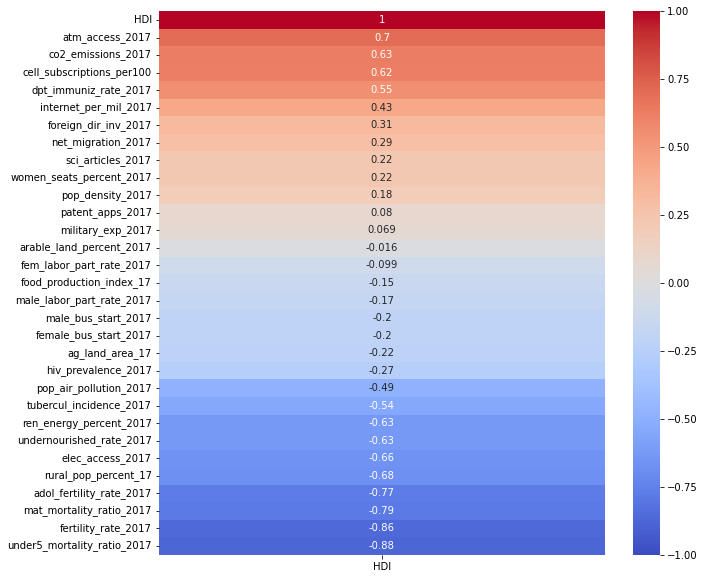

In [262]:
# distill features down
# comparing correlations of all numerical features to target 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['HDI']].sort_values(by = 'HDI', ascending=False), 
            annot=True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm'); 

-----
## Adding the Development Categories

In [263]:
# adding the development categorizations
df['development'] = df['HDI'].map(lambda x: 'low' if x < 0.55 else ('medium' if  x <= 0.699 else ('high' if x <= 0.799 else ('very high'))))

In [264]:
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI,development
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,43.448181,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509,low
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,10.799292,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582,medium
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792,high
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,3415.717495,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867,very high
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,1285.099111,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889,very high


In [265]:
# Adding a range for each of the development categorizations for modeling
df['dev_tier'] = df['development'].map({'low': 0, 'medium': 1, 'high': 2, 'very high': 3})
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI,development,dev_tier
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509,low,0
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582,medium,1
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792,high,2
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867,very high,3
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889,very high,3


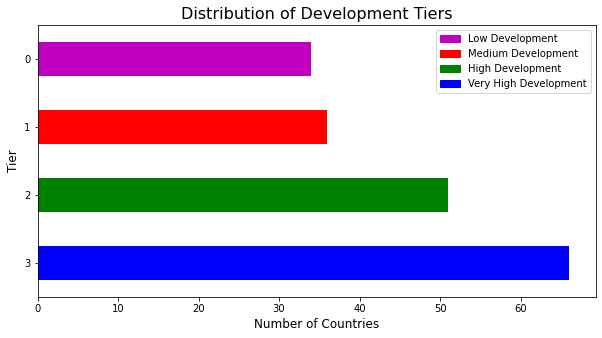

In [266]:
# mpatches library was sourced from matplotlib documentation: https://matplotlib.org/stable/api/patches_api.html

plt.figure(figsize = (10,5))

colormapping = {0:'blue',1:'green',2:'red', 3:'yellow'}
(df['dev_tier'].value_counts()).plot(kind = 'barh', color = ['b','g','r','m'])

plt.title('Distribution of Development Tiers', fontsize = 16)
plt.ylabel('Tier', fontsize = 12)
plt.xlabel('Number of Countries', fontsize = 12);

low = mpatches.Patch(color='m', label='Low Development')
med = mpatches.Patch(color='r', label='Medium Development')
hi = mpatches.Patch(color='g', label= 'High Development')
vhi = mpatches.Patch(color='b', label='Very High Development')
plt.legend(handles=[low,med,hi,vhi], loc=1);